In [11]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [12]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import scale

In [13]:
df = pd.read_csv('haberman-clustering.csv')

In [14]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [15]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
df_normalized.head()

,Age,Op_year,axil_nodes
0,-0.987066,-0.135932,-0.084991
1,-0.923446,0.281903,-0.260341
2,-0.846824,-0.514674,-0.134166
3,-0.952356,0.304282,-0.020764
4,-0.727400,-0.611527,0.311326


c:\Users\Uddhav Pisharody\AppData\Local\Programs\Python\Python311\Lib\site-packages\minisom.py:162: UserWarning:


c:\Users\Uddhav Pisharody\AppData\Local\Programs\Python\Python311\Lib\site-packages\minisom.py:205: UserWarning:

sigma should be an integer >=1 when triangle or bubbleare used as neighborhood function

c:\Users\Uddhav Pisharody\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\linalg\linalg.py:2541: RuntimeWarning:

overflow encountered in multiply

c:\Users\Uddhav Pisharody\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\linalg\linalg.py:2542: RuntimeWarning:

overflow encountered in reduce



 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.7713703509769805


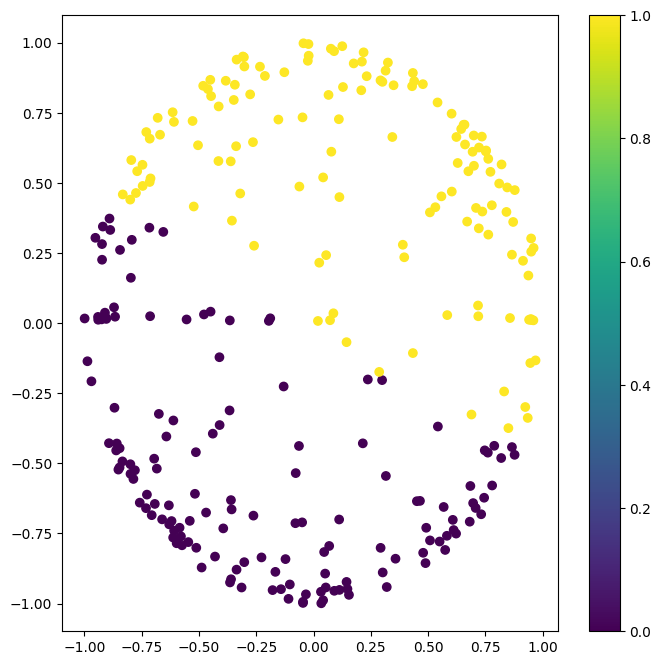

In [16]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale

som_rows = 2
som_columns = 1
input_dim = df_normalized.shape[1]  # Number of columns in DataFrame

# Training the SOM
som = MiniSom(som_rows, som_columns, input_dim, sigma=2.9, learning_rate=0.5,
              neighborhood_function='triangle', random_seed=10)

data_normalized = df_normalized.values

# Training the SOM with 10000 epochs
som.train(data_normalized, 10000, random_order=False, verbose=True)

# Get the cluster assignments
cluster_assignments = np.array([som.winner(x) for x in data_normalized]).T

# Visualize the results
plt.figure(figsize=(8, 8))
plt.scatter(df_normalized.values[:, 0], df_normalized.values[:, 1], c=cluster_assignments[0], cmap='viridis')
plt.colorbar()
plt.show()

In [17]:
silhouette_avg = silhouette_score(data_normalized, cluster_assignments[0])
ch_index = calinski_harabasz_score(data_normalized, cluster_assignments[0])
db_index = davies_bouldin_score(data_normalized, cluster_assignments[0])
print("Silhouette Score:", silhouette_avg)
print("Calinski Harabasz Score:", ch_index)
print("Davies Bouldin Index:", db_index)

Silhouette Score: 0.32509814058858266
Calinski Harabasz Score: 138.7061221897205
Davies Bouldin Index: 1.3611273356310636


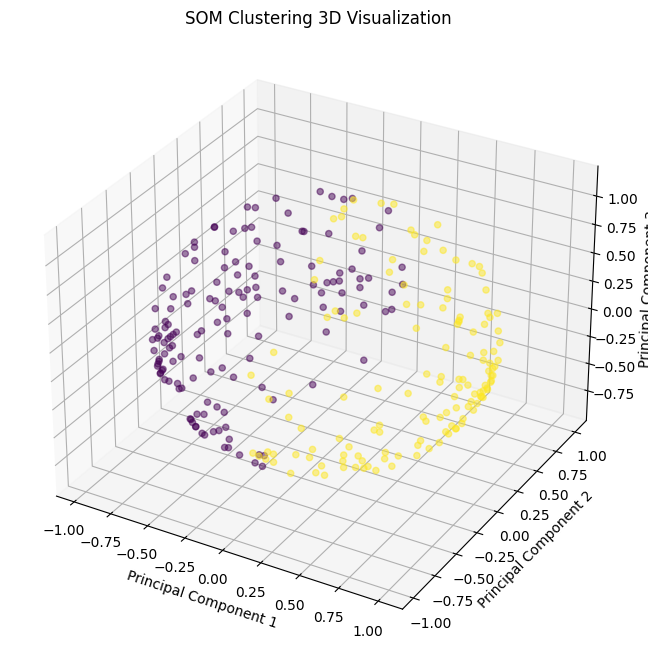

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

cluster_assignments = np.array([som.winner(x) for x in data_normalized]).T

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=3)  # Use 3 principal components for 3D visualization
X_pca = pca.fit_transform(data_normalized)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use cluster_assignments for color-coding the points
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_assignments[0], cmap='viridis', alpha=0.5)

ax.set_title('SOM Clustering 3D Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

In [19]:
import plotly.graph_objects as go
from sklearn.decomposition import PCA

cluster_assignments = np.array([som.winner(x) for x in data_normalized]).T

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=3)  # Use 3 principal components for 3D visualization
X_pca = pca.fit_transform(data_normalized)

# Create a 3D scatter plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    mode='markers',
    marker=dict(color=cluster_assignments[0], colorscale='viridis', opacity=0.5),
    text='Cluster Assignments'
))

fig.update_layout(scene=dict(
                    xaxis_title='Principal Component 1',
                    yaxis_title='Principal Component 2',
                    zaxis_title='Principal Component 3'),
                  title='SOM Clustering 3D Visualization',
                  margin=dict(l=0, r=0, b=0, t=0))

fig.show()

In [20]:
from collections import Counter

cluster_assignments = np.array([som.winner(x) for x in data_normalized]).T

# Get the number of data points in each cluster
cluster_counts = Counter(cluster_assignments[0])

# Print the number of data points in each cluster
for cluster, count in cluster_counts.items():
    print(f'Cluster {cluster}: {count} data points')

Cluster 0: 145 data points
Cluster 1: 137 data points
